In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
lapd_data = pd.read_csv('crime_dataset.csv')
lapd_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,modus_operandi,victim_age,...,crime_code_1,crime_code_2,crime_code_3,crime_code_4,incident_admincode,location,cross_street,latitude,longitude,case_solved
0,211414090,2021-06-27,2021-06-20 20:00:00,14,Pacific,1464,1,480,0344,32.0,...,480.0,NaN,NaN,NaN,0,12400 FIELDING,NaN,33.9791,-118.4092,Not solved
1,210504861,2021-01-22,2021-01-21 22:00:00,5,Harbor,515,1,510,NaN,0.0,...,510.0,NaN,NaN,NaN,1,1500 BAY VIEW AV,NaN,33.7929,-118.2710,Solved
2,210104843,2021-01-21,2021-01-21 02:00:00,1,Central,139,1,510,NaN,0.0,...,510.0,NaN,NaN,NaN,1,300 S SANTA FE AV,NaN,34.0420,-118.2326,Solved
3,210115564,2021-08-22,2021-08-22 07:00:00,1,Central,151,1,350,1308 0344 0345 1822,29.0,...,350.0,NaN,NaN,NaN,0,7TH,FIGUEROA,34.0496,-118.2603,Not solved
4,211421187,2021-11-09,2021-11-07 19:00:00,14,Pacific,1465,1,510,NaN,0.0,...,510.0,NaN,NaN,NaN,0,5500 MESMER AV,NaN,33.9869,-118.4022,Not solved


In [3]:
crime_types = pd.read_csv('crime_types.csv')
crime_types.head()

,crime_code,crime_description
0,480,BIKE - STOLEN
1,510,VEHICLE - STOLEN
2,350,"THEFT, PERSON"
3,440,THEFT PLAIN - PETTY ($950 & UNDER)
4,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)


In [4]:
weapon_types = pd.read_csv('weapon_types.csv')
weapon_types.head()

,weapon_code,weapon_description
0,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
1,500,UNKNOWN WEAPON/OTHER WEAPON
2,102,HAND GUN
3,201,KNIFE WITH BLADE OVER 6 INCHES IN LENGTH
4,107,OTHER FIREARM


In [5]:
if 'crime_description' not in lapd_data.columns:
    lapd_data = lapd_data.merge(crime_types, on='crime_code', how='left')

In [6]:
if 'weapon_description' not in lapd_data.columns:
    lapd_data = lapd_data.merge(weapon_types, on='weapon_code', how='left')

In [7]:
lapd_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,modus_operandi,victim_age,...,crime_code_3,crime_code_4,incident_admincode,location,cross_street,latitude,longitude,case_solved,crime_description,weapon_description
0,211414090,2021-06-27,2021-06-20 20:00:00,14,Pacific,1464,1,480,0344,32.0,...,NaN,NaN,0,12400 FIELDING,NaN,33.9791,-118.4092,Not solved,BIKE - STOLEN,NaN
1,210504861,2021-01-22,2021-01-21 22:00:00,5,Harbor,515,1,510,NaN,0.0,...,NaN,NaN,1,1500 BAY VIEW AV,NaN,33.7929,-118.2710,Solved,VEHICLE - STOLEN,NaN
2,210104843,2021-01-21,2021-01-21 02:00:00,1,Central,139,1,510,NaN,0.0,...,NaN,NaN,1,300 S SANTA FE AV,NaN,34.0420,-118.2326,Solved,VEHICLE - STOLEN,NaN
3,210115564,2021-08-22,2021-08-22 07:00:00,1,Central,151,1,350,1308 0344 0345 1822,29.0,...,NaN,NaN,0,7TH,FIGUEROA,34.0496,-118.2603,Not solved,"THEFT, PERSON",NaN
4,211421187,2021-11-09,2021-11-07 19:00:00,14,Pacific,1465,1,510,NaN,0.0,...,NaN,NaN,0,5500 MESMER AV,NaN,33.9869,-118.4022,Not solved,VEHICLE - STOLEN,NaN


In [8]:
lapd_data.isnull().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
modus_operandi          28929
victim_age               4062
victim_gender           27729
victim_ethnicity        27731
premise_code                3
premise_description        92
weapon_code            131843
crime_code_1                2
crime_code_2           187239
crime_code_3           202560
crime_code_4           203071
incident_admincode          0
location                    0
cross_street           167414
latitude                    0
longitude                   0
case_solved                 0
crime_description           0
weapon_description     131843
dtype: int64

Cleaning and Handling of Missing Datas

In [9]:
crime_code_repeat = ['crime_code_1', 'crime_code_2', 'crime_code_3', 'crime_code_4']
lapd_data.drop(columns=crime_code_repeat,inplace=True)

In [10]:
lapd_data['victim_age'][lapd_data['victim_age'] == 0].value_counts()

victim_age
0.0    48488
Name: count, dtype: int64

In [11]:
lapd_data['victim_gender'].unique()

array(['M', nan, 'Male', 'F', 'X', 'Female', 'H'], dtype=object)

In [12]:
col_age = {
    'Male' : 'M',
    'Female' : 'F',
    'X' : 'Unknown',
    'H' : 'Unknown'
}
mapping = lapd_data['victim_gender'].replace(col_age)

In [13]:
lapd_data['victim_gender'] = mapping

In [14]:
lapd_data['victim_gender'] = lapd_data['victim_gender'].fillna('Unknown')
lapd_data['victim_gender'].unique()

array(['M', 'Unknown', 'F'], dtype=object)

In [15]:
median_age = lapd_data['victim_age'].median()
lapd_data['victim_age'] = lapd_data['victim_age'].replace(0.0, pd.NA)
lapd_data['victim_age'] = lapd_data['victim_age'].fillna(median_age)
lapd_data['victim_age']

/var/folders/5l/3g97y2515jdf5b3ml57ym0c80000gn/T/ipykernel_43960/3860917693.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lapd_data['victim_age'] = lapd_data['victim_age'].fillna(median_age)


0         32.0
1         31.0
2         31.0
3         29.0
4         31.0
          ... 
203084    36.0
203085    19.0
203086    31.0
203087    15.0
203088    31.0
Name: victim_age, Length: 203089, dtype: float64

In [16]:
lapd_data['victim_ethnicity'].unique()

array(['W', nan, 'H', 'O', 'B', 'X', 'A', 'K', 'C', 'I', 'F', 'Rare', 'V',
       'J', 'Z'], dtype=object)

In [17]:
#naming convention is according to Los angeles ethnicity & usa federal standard source
col_ethnicity = {
    'A' : 'Other Asian',
    'B' : 'Black',
    'C' : 'Chinese',
    'F' : 'Filipino',
    'H' : 'Hispanic/Latin/Mexican',
    'I' : 'American Indian/Alaskan Native',
    'J' : 'Japanese',
    'K' : 'Korean',
    'O' : 'Other',
    'V' : 'Vietnamese',
    'W' : 'White',
    'X' : 'Unknown',
    'Rare' : 'Unknown',
    'Z' : 'Asian Indian'
}
lapd_data['victim_ethnicity'] = lapd_data['victim_ethnicity'].replace(col_ethnicity)
lapd_data['victim_ethnicity'] = lapd_data['victim_ethnicity'].fillna('Unknown')

In [18]:
lapd_data['weapon_description'].nunique()

73

In [19]:
lapd_data['weapon_description'] = lapd_data['weapon_description'].fillna('None')
lapd_data['premise_description'] = lapd_data['premise_description'].fillna('Unknown')

In [20]:
lapd_data[['location', 'cross_street']]

,location,cross_street
0,12400 FIELDING,NaN
1,1500 BAY VIEW AV,NaN
2,300 S SANTA FE AV,NaN
3,7TH,FIGUEROA
4,5500 MESMER AV,NaN
...,...,...
203084,00 WINDWARD AV,NaN
203085,1900 S GRAND AV,NaN
203086,2300 MIRAMAR ST,NaN
203087,CRENSHAW BL,STOCKER ST


In [21]:
lapd_data['location'] = lapd_data['location'].str.strip()
lapd_data['location'] = lapd_data['location'].apply(lambda x: re.sub(r'\s+', ' ', x))
lapd_data['location'].unique()

array(['12400 FIELDING', '1500 BAY VIEW AV', '300 S SANTA FE AV', ...,
       '1400 S DE LA TORRE WY', '23100 FRIAR ST', 'AVERILL AV'],
      dtype=object)

In [22]:
lapd_data.duplicated().any()

np.False_

In [23]:
lapd_data = lapd_data.drop_duplicates()

In [24]:
lapd_data['date_reported'] = pd.to_datetime(lapd_data['date_reported'], errors='coerce')
lapd_data['date_occurred'] = pd.to_datetime(lapd_data['date_occurred'],errors='coerce')

In [25]:
lapd_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,modus_operandi,victim_age,...,premise_description,weapon_code,incident_admincode,location,cross_street,latitude,longitude,case_solved,crime_description,weapon_description
0,211414090,2021-06-27,2021-06-20 20:00:00,14,Pacific,1464,1,480,0344,32.0,...,GARAGE/CARPORT,NaN,0,12400 FIELDING,NaN,33.9791,-118.4092,Not solved,BIKE - STOLEN,None
1,210504861,2021-01-22,2021-01-21 22:00:00,5,Harbor,515,1,510,NaN,31.0,...,STREET,NaN,1,1500 BAY VIEW AV,NaN,33.7929,-118.2710,Solved,VEHICLE - STOLEN,None
2,210104843,2021-01-21,2021-01-21 02:00:00,1,Central,139,1,510,NaN,31.0,...,STREET,NaN,1,300 S SANTA FE AV,NaN,34.0420,-118.2326,Solved,VEHICLE - STOLEN,None
3,210115564,2021-08-22,2021-08-22 07:00:00,1,Central,151,1,350,1308 0344 0345 1822,29.0,...,SIDEWALK,NaN,0,7TH,FIGUEROA,34.0496,-118.2603,Not solved,"THEFT, PERSON",None
4,211421187,2021-11-09,2021-11-07 19:00:00,14,Pacific,1465,1,510,NaN,31.0,...,STREET,NaN,0,5500 MESMER AV,NaN,33.9869,-118.4022,Not solved,VEHICLE - STOLEN,None


In [26]:
lapd_data.isnull().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
modus_operandi          28929
victim_age                  0
victim_gender               0
victim_ethnicity            0
premise_code                3
premise_description         0
weapon_code            131843
incident_admincode          0
location                    0
cross_street           167414
latitude                    0
longitude                   0
case_solved                 0
crime_description           0
weapon_description          0
dtype: int64

In [34]:
lapd_data.drop(columns=['days_to_report'], inplace=True)

In [35]:
lapd_data['case_solved'] = lapd_data['case_solved'].replace({'Solved' : 1, 'Not solved' : 0})
lapd_data['days_to_report'] = (
    (lapd_data['date_reported'] - lapd_data['date_occurred']).dt.total_seconds() / 86400
)
lapd_data['days_to_report'] = lapd_data['days_to_report'].apply(lambda x: int(x) if x >= 0 else 0)


In [36]:
lapd_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,modus_operandi,victim_age,...,weapon_code,incident_admincode,location,cross_street,latitude,longitude,case_solved,crime_description,weapon_description,days_to_report
0,211414090,2021-06-27,2021-06-20 20:00:00,14,Pacific,1464,1,480,0344,32.0,...,NaN,0,12400 FIELDING,NaN,33.9791,-118.4092,0,BIKE - STOLEN,None,6
1,210504861,2021-01-22,2021-01-21 22:00:00,5,Harbor,515,1,510,NaN,31.0,...,NaN,1,1500 BAY VIEW AV,NaN,33.7929,-118.2710,1,VEHICLE - STOLEN,None,0
2,210104843,2021-01-21,2021-01-21 02:00:00,1,Central,139,1,510,NaN,31.0,...,NaN,1,300 S SANTA FE AV,NaN,34.0420,-118.2326,1,VEHICLE - STOLEN,None,0
3,210115564,2021-08-22,2021-08-22 07:00:00,1,Central,151,1,350,1308 0344 0345 1822,29.0,...,NaN,0,7TH,FIGUEROA,34.0496,-118.2603,0,"THEFT, PERSON",None,0
4,211421187,2021-11-09,2021-11-07 19:00:00,14,Pacific,1465,1,510,NaN,31.0,...,NaN,0,5500 MESMER AV,NaN,33.9869,-118.4022,0,VEHICLE - STOLEN,None,1


Exploratory Data Analysis

In [39]:
summary_statistic = lapd_data.drop(columns=['division_number','date_reported','date_occurred','modus_operandi']).describe()
summary_statistic

,area,reporting_district,part,crime_code,victim_age,premise_code,weapon_code,incident_admincode,latitude,longitude,case_solved,days_to_report
count,203089.000000,203089.000000,203089.000000,203089.000000,203089.000000,203086.000000,71246.000000,203089.000000,203089.000000,203089.000000,203089.000000,203089.000000
mean,10.751075,1121.524189,1.405118,504.364879,37.385609,297.406266,358.930943,0.214556,33.826701,-117.499034,0.208967,4.446543
std,6.061707,606.272483,0.490916,209.716701,13.792849,216.205401,125.633107,0.410515,2.888534,10.026599,0.406572,19.158993
min,1.000000,101.000000,1.000000,110.000000,2.000000,101.000000,101.000000,0.000000,0.000000,-118.667300,0.000000,0.000000
25%,6.000000,628.000000,1.000000,330.000000,31.000000,101.000000,307.000000,0.000000,34.011100,-118.429100,0.000000,0.000000
50%,11.000000,1144.000000,1.000000,480.000000,31.000000,203.000000,400.000000,0.000000,34.058100,-118.322500,0.000000,0.000000
75%,16.000000,1612.000000,2.000000,626.000000,45.000000,501.000000,400.000000,0.000000,34.161100,-118.274100,0.000000,1.000000
max,21.000000,2199.000000,2.000000,956.000000,99.000000,971.000000,516.000000,1.000000,34.334300,0.000000,1.000000,363.000000


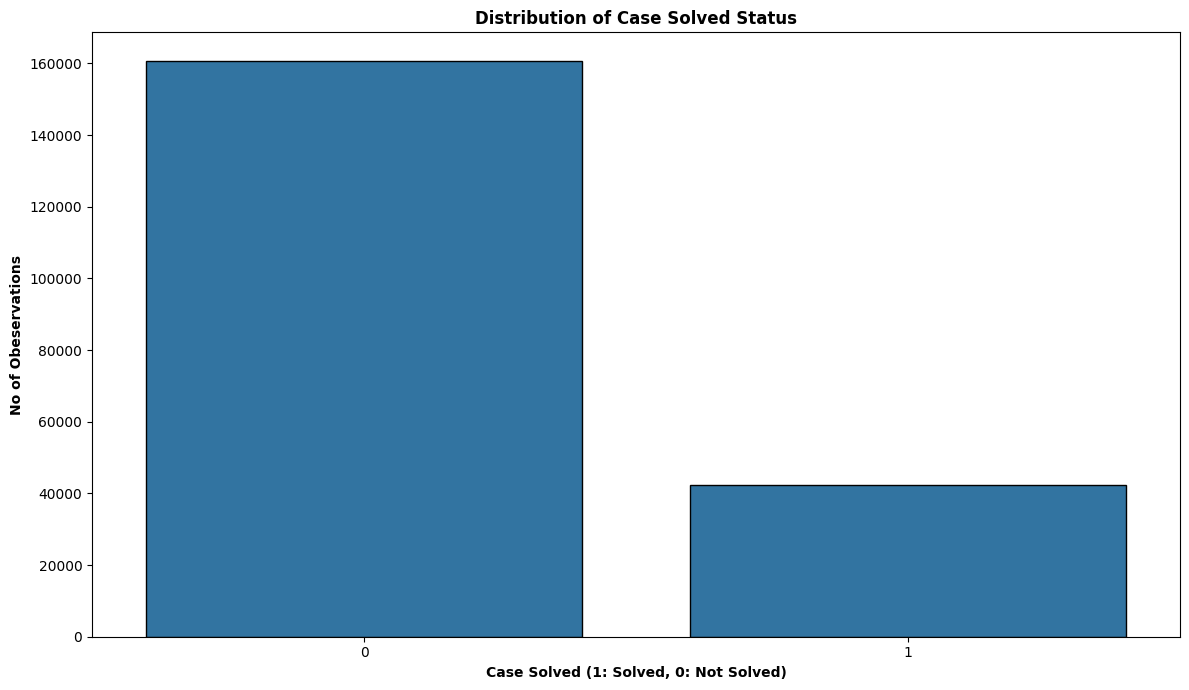

In [66]:
plt.figure(figsize=(12,7))
sns.countplot(x='case_solved', data=lapd_data, edgecolor='black')
plt.title('Distribution of Case Solved Status',fontweight='bold')
plt.xlabel('Case Solved (1: Solved, 0: Not Solved)',fontweight='bold')
plt.ylabel('No of Obeservations',fontweight='bold')
plt.tight_layout()
#plt.savefig('case_solved_distribution.png')
plt.show()

Temporal Analysis

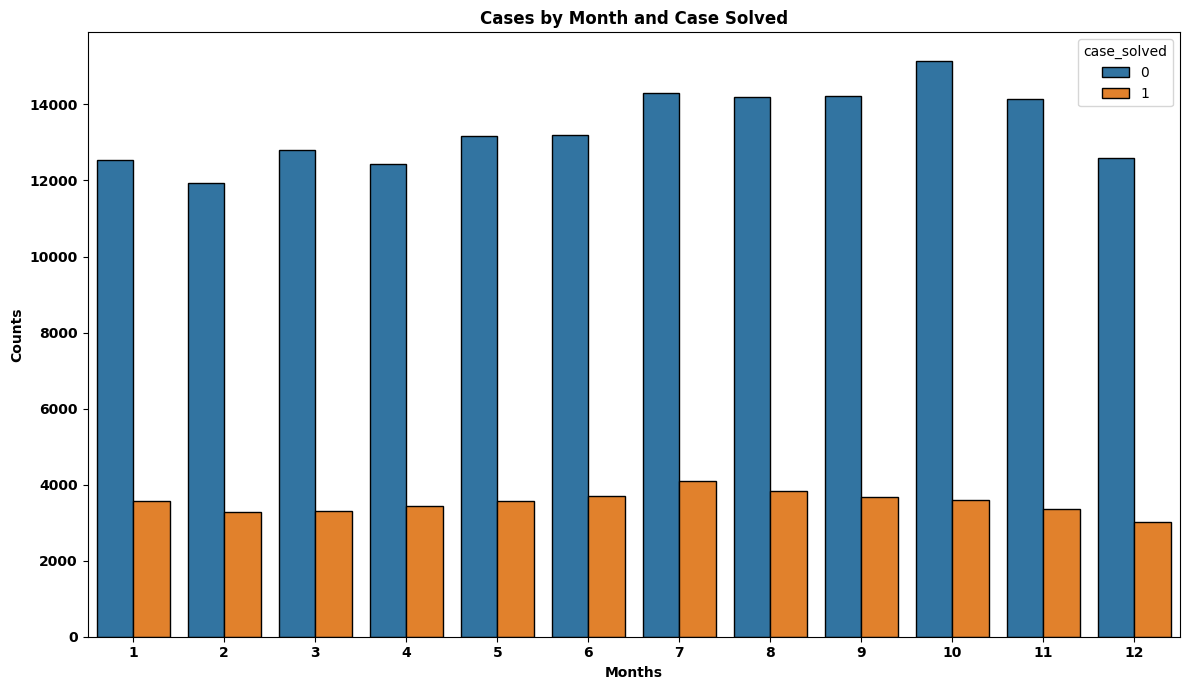

In [159]:

temporal_time = lapd_data['date_occurred'].dt.month
plt.figure(figsize=(12,7))
sns.countplot(x=temporal_time, hue=lapd_data['case_solved'], edgecolor='black')
plt.title('Cases by Month and Case Solved',fontweight='bold')
plt.xlabel('Months',fontweight='bold')
plt.ylabel('Counts',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout() 
#plt.savefig('case_solved_distribution.png')
plt.show()

Victim Analysis

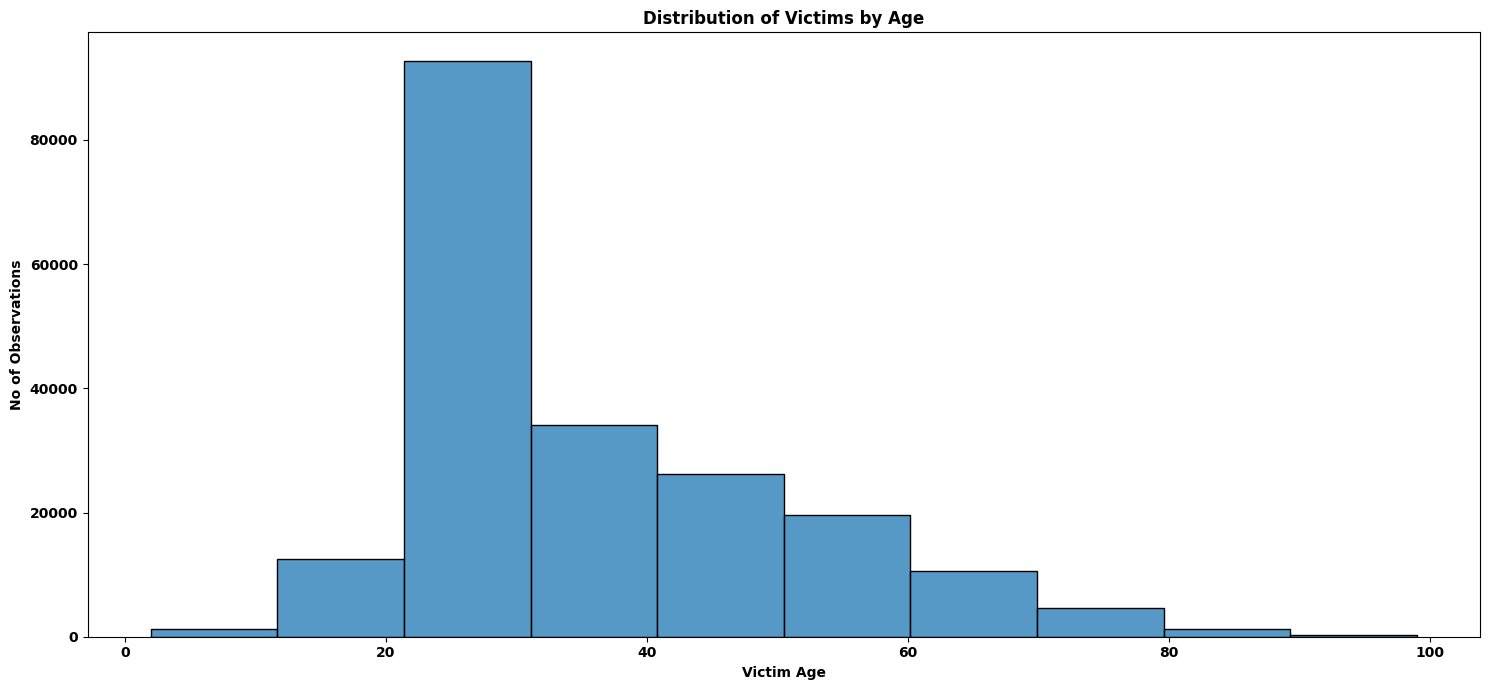

In [160]:
plt.figure(figsize=(15,7))
sns.histplot(x='victim_age', data=lapd_data, bins=10, edgecolor='black')
plt.title('Distribution of Victims by Age', fontweight='bold')
plt.xlabel('Victim Age', fontweight='bold')
plt.ylabel('No of Observations', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

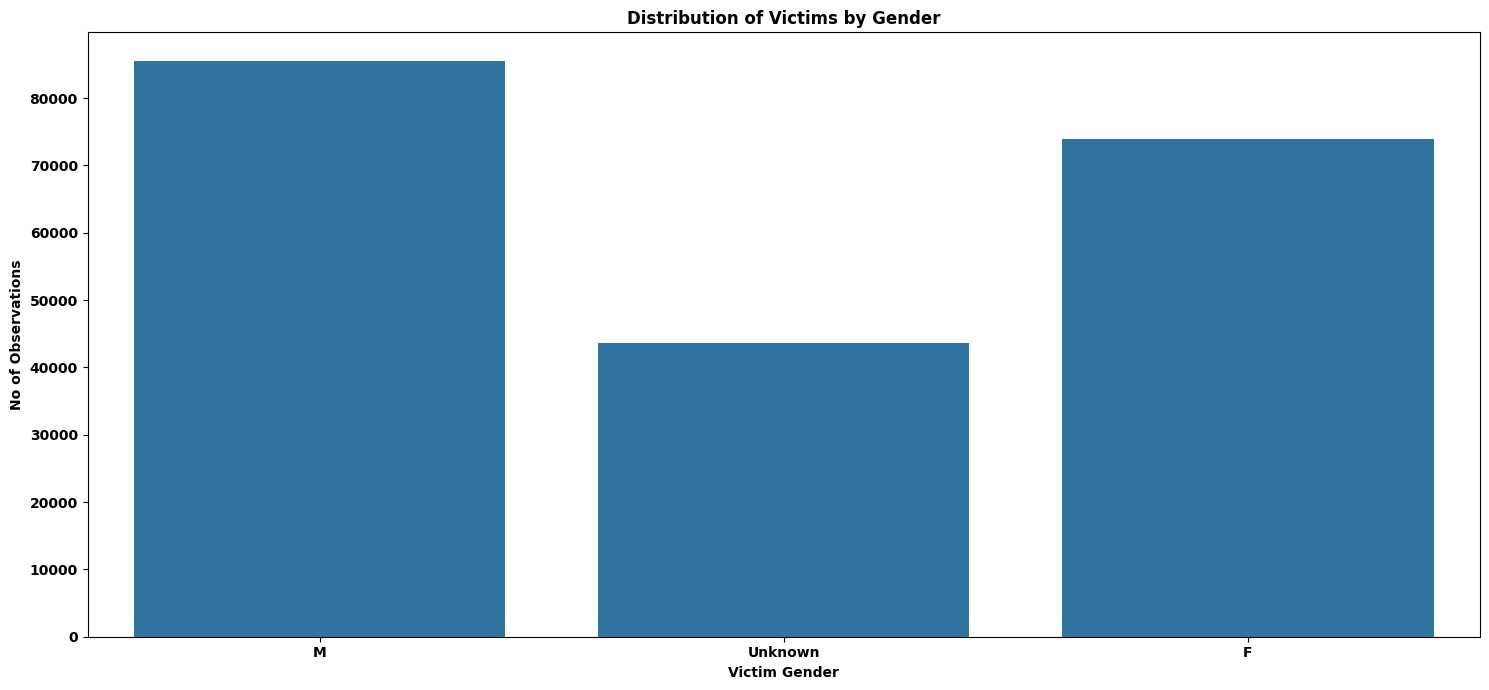

In [161]:
plt.figure(figsize=(15,7))
sns.countplot(x='victim_gender', data=lapd_data)
plt.title('Distribution of Victims by Gender', fontweight='bold')
plt.xlabel('Victim Gender', fontweight='bold')
plt.ylabel('No of Observations', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

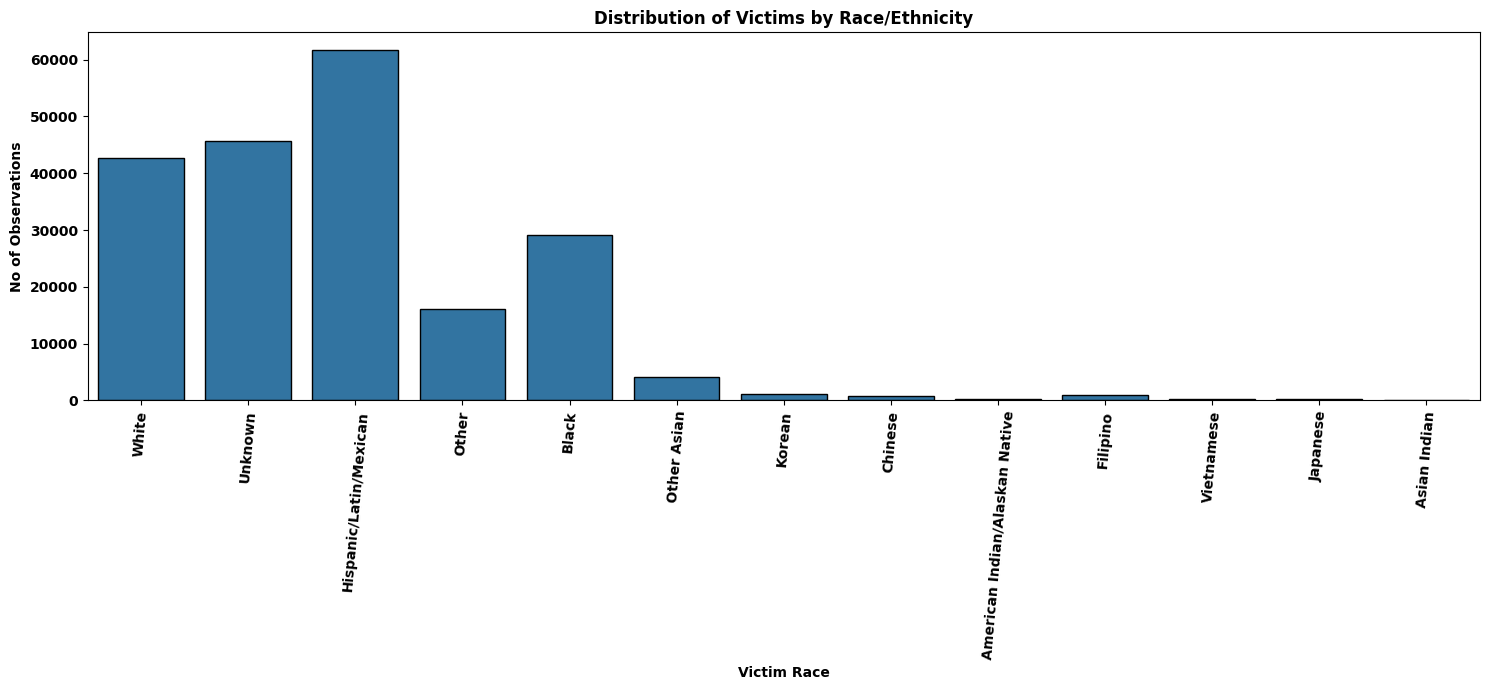

In [162]:
plt.figure(figsize=(15,7))
sns.countplot(x='victim_ethnicity', data=lapd_data, edgecolor='black')
plt.title('Distribution of Victims by Race/Ethnicity', fontweight='bold')
plt.xlabel('Victim Race', fontweight='bold')
plt.ylabel('No of Observations', fontweight='bold')
plt.xticks(fontweight='bold', rotation=85)
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

Crime Analysis

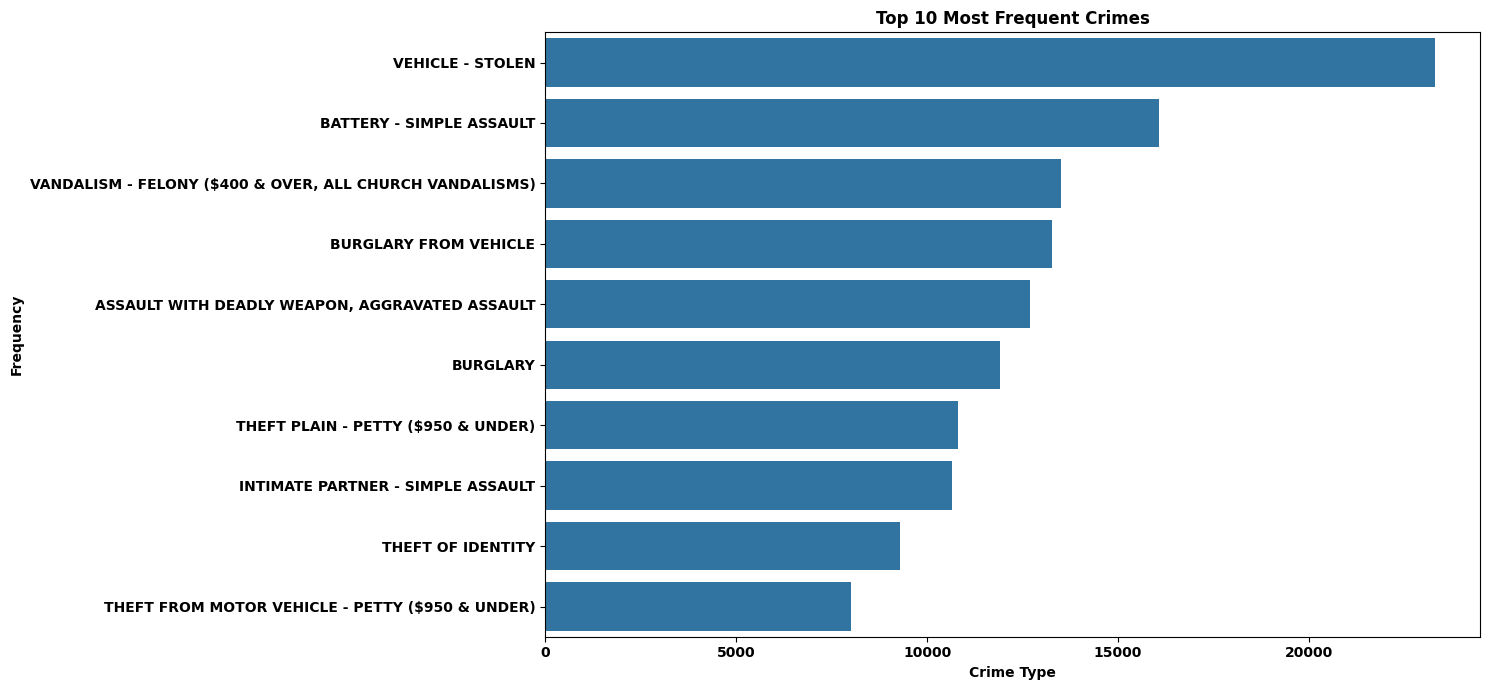

In [163]:
top_10_crime = lapd_data['crime_description'].value_counts().nlargest(10).reset_index()
top_10_crime.columns = ['crime_description', 'counts']
plt.figure(figsize=(15,7))
sns.barplot(data=top_10_crime, y='crime_description', x='counts')
plt.title('Top 10 Most Frequent Crimes', fontweight='bold')
plt.xlabel('Crime Type', fontweight='bold', fontsize=10)
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


In [164]:
lapd_data['weapon_description'] = lapd_data['weapon_description'].replace({'None' : 'NONE/NO WEAPON'})

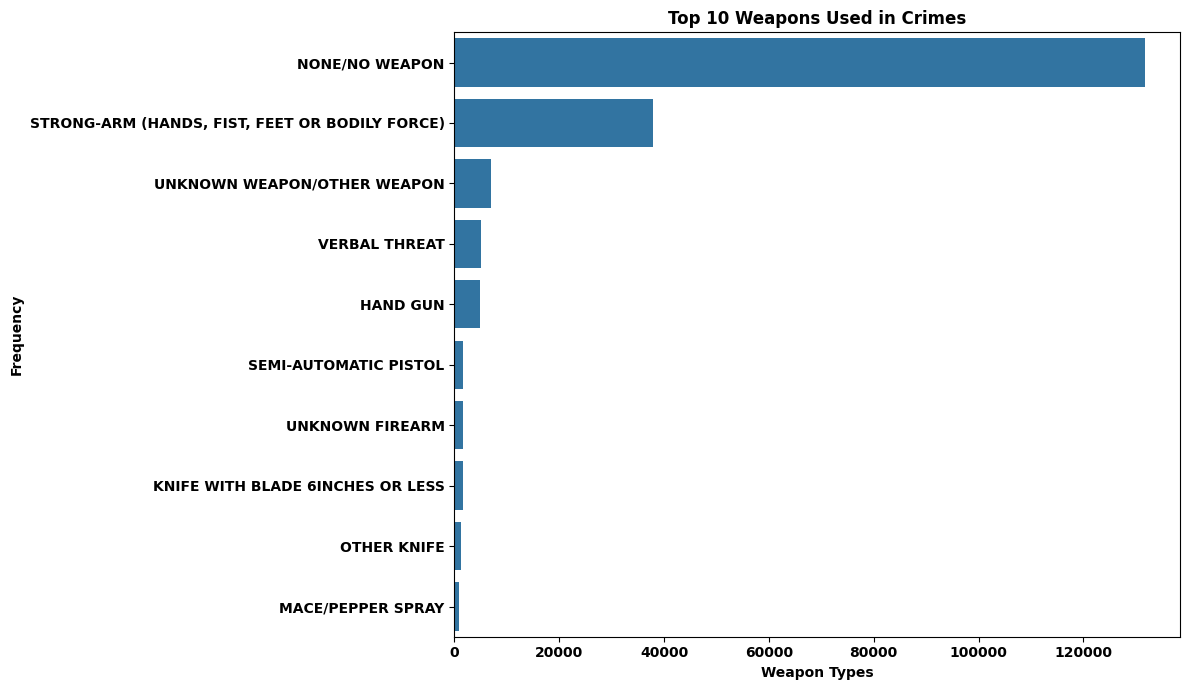

In [165]:
top_used_weapons = lapd_data['weapon_description'].value_counts().nlargest(10).reset_index()
top_used_weapons.columns = ['weapon_types', 'counts']
plt.figure(figsize=(12,7))
sns.barplot(data=top_used_weapons, x='counts', y='weapon_types')
plt.title('Top 10 Weapons Used in Crimes', fontweight='bold')
plt.xlabel('Weapon Types', fontweight='bold', fontsize=10)
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


Solved Rate by Crime types

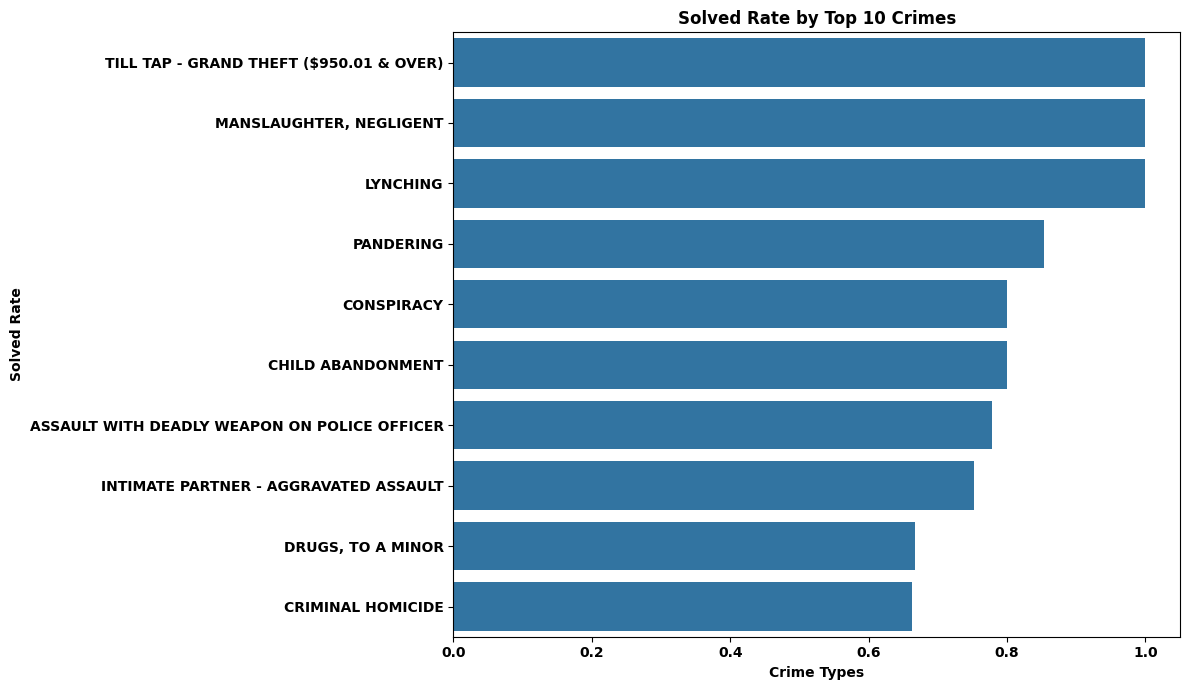

In [166]:
rated_solved_crime = lapd_data.groupby('crime_description')['case_solved'].mean().sort_values(ascending=False).nlargest(10).reset_index()
rated_solved_crime.columns = ['crime_types', 'avg solved case']
plt.figure(figsize=(12,7))
sns.barplot(data=rated_solved_crime, x='avg solved case', y='crime_types')
plt.title('Solved Rate by Top 10 Crimes', fontweight='bold')
plt.xlabel('Crime Types', fontweight='bold', fontsize=10)
plt.ylabel('Solved Rate', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


Spatial Analysis

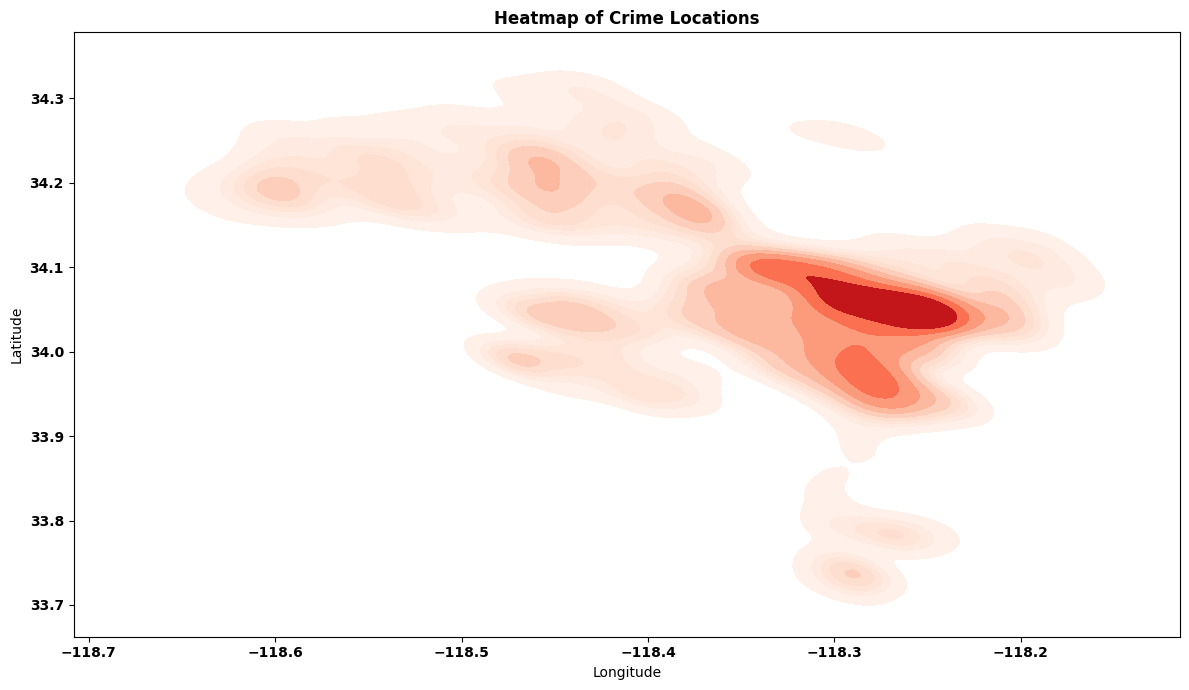

In [175]:
df_clean = lapd_data[(lapd_data['latitude'] != 0) & (lapd_data['longitude'] != 0)]

plt.figure(figsize=(12, 7))
sns.kdeplot(x='longitude', y='latitude', data=df_clean, cmap='Reds', fill=True, thresh=0.05)
plt.title('Heatmap of Crime Locations',fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
#plt.savefig('crime_heatmap.png')
plt.show()

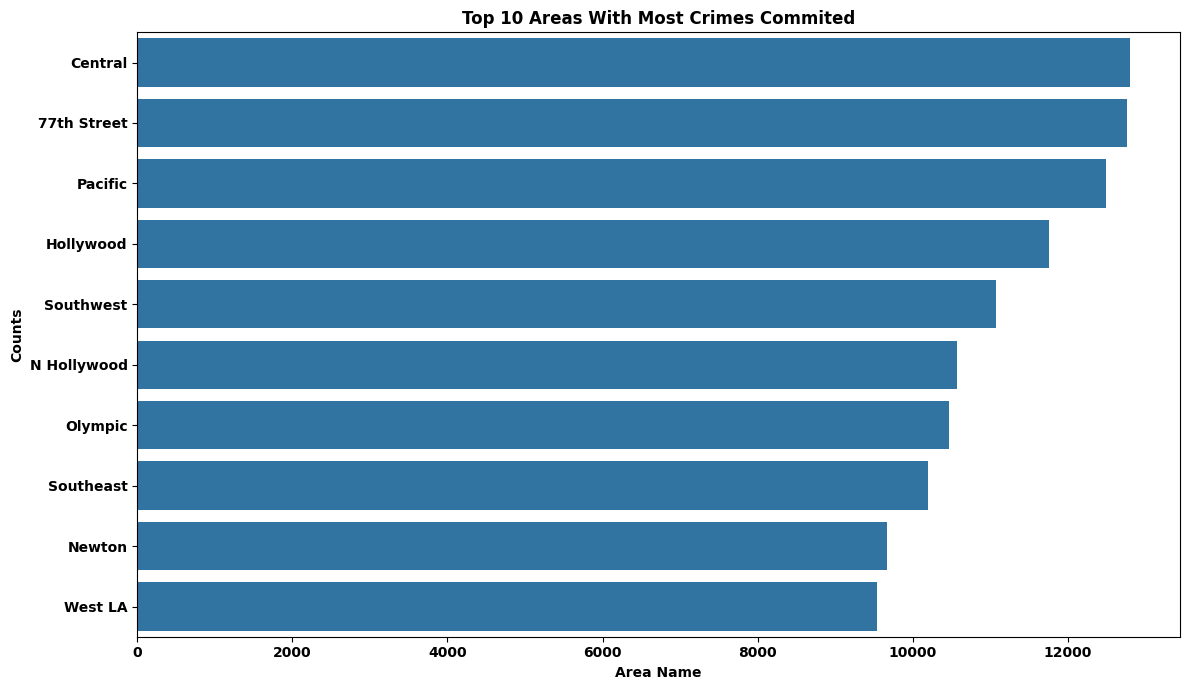

In [176]:
top_used_weapons = lapd_data['area_name'].value_counts().nlargest(10).reset_index()
top_used_weapons.columns = ['area', 'counts']
plt.figure(figsize=(12,7))
sns.barplot(data=top_used_weapons, x='counts', y='area')
plt.title('Top 10 Areas With Most Crimes Commited', fontweight='bold')
plt.xlabel('Area Name', fontweight='bold', fontsize=10)
plt.ylabel('Counts', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

Correlation Analysis

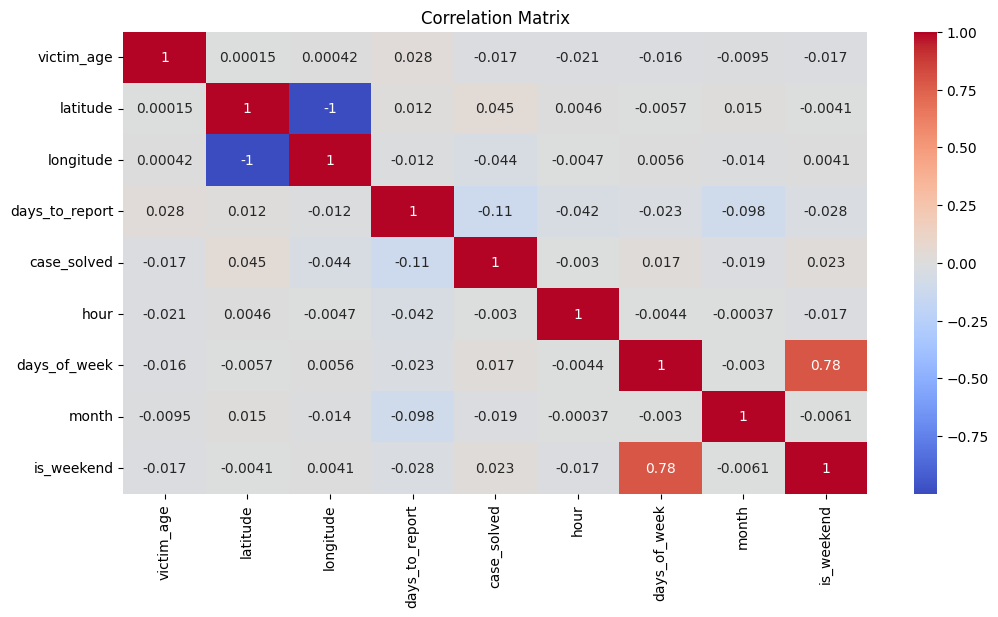

In [215]:

numeric_cols = ['victim_age', 'latitude', 'longitude', 'days_to_report','case_solved', 'hour', 'days_of_week', 'month', 'is_weekend']
plt.figure(figsize=(12, 6))
sns.heatmap(lapd_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
#plt.savefig('correlation_matrix.png')
plt.show()

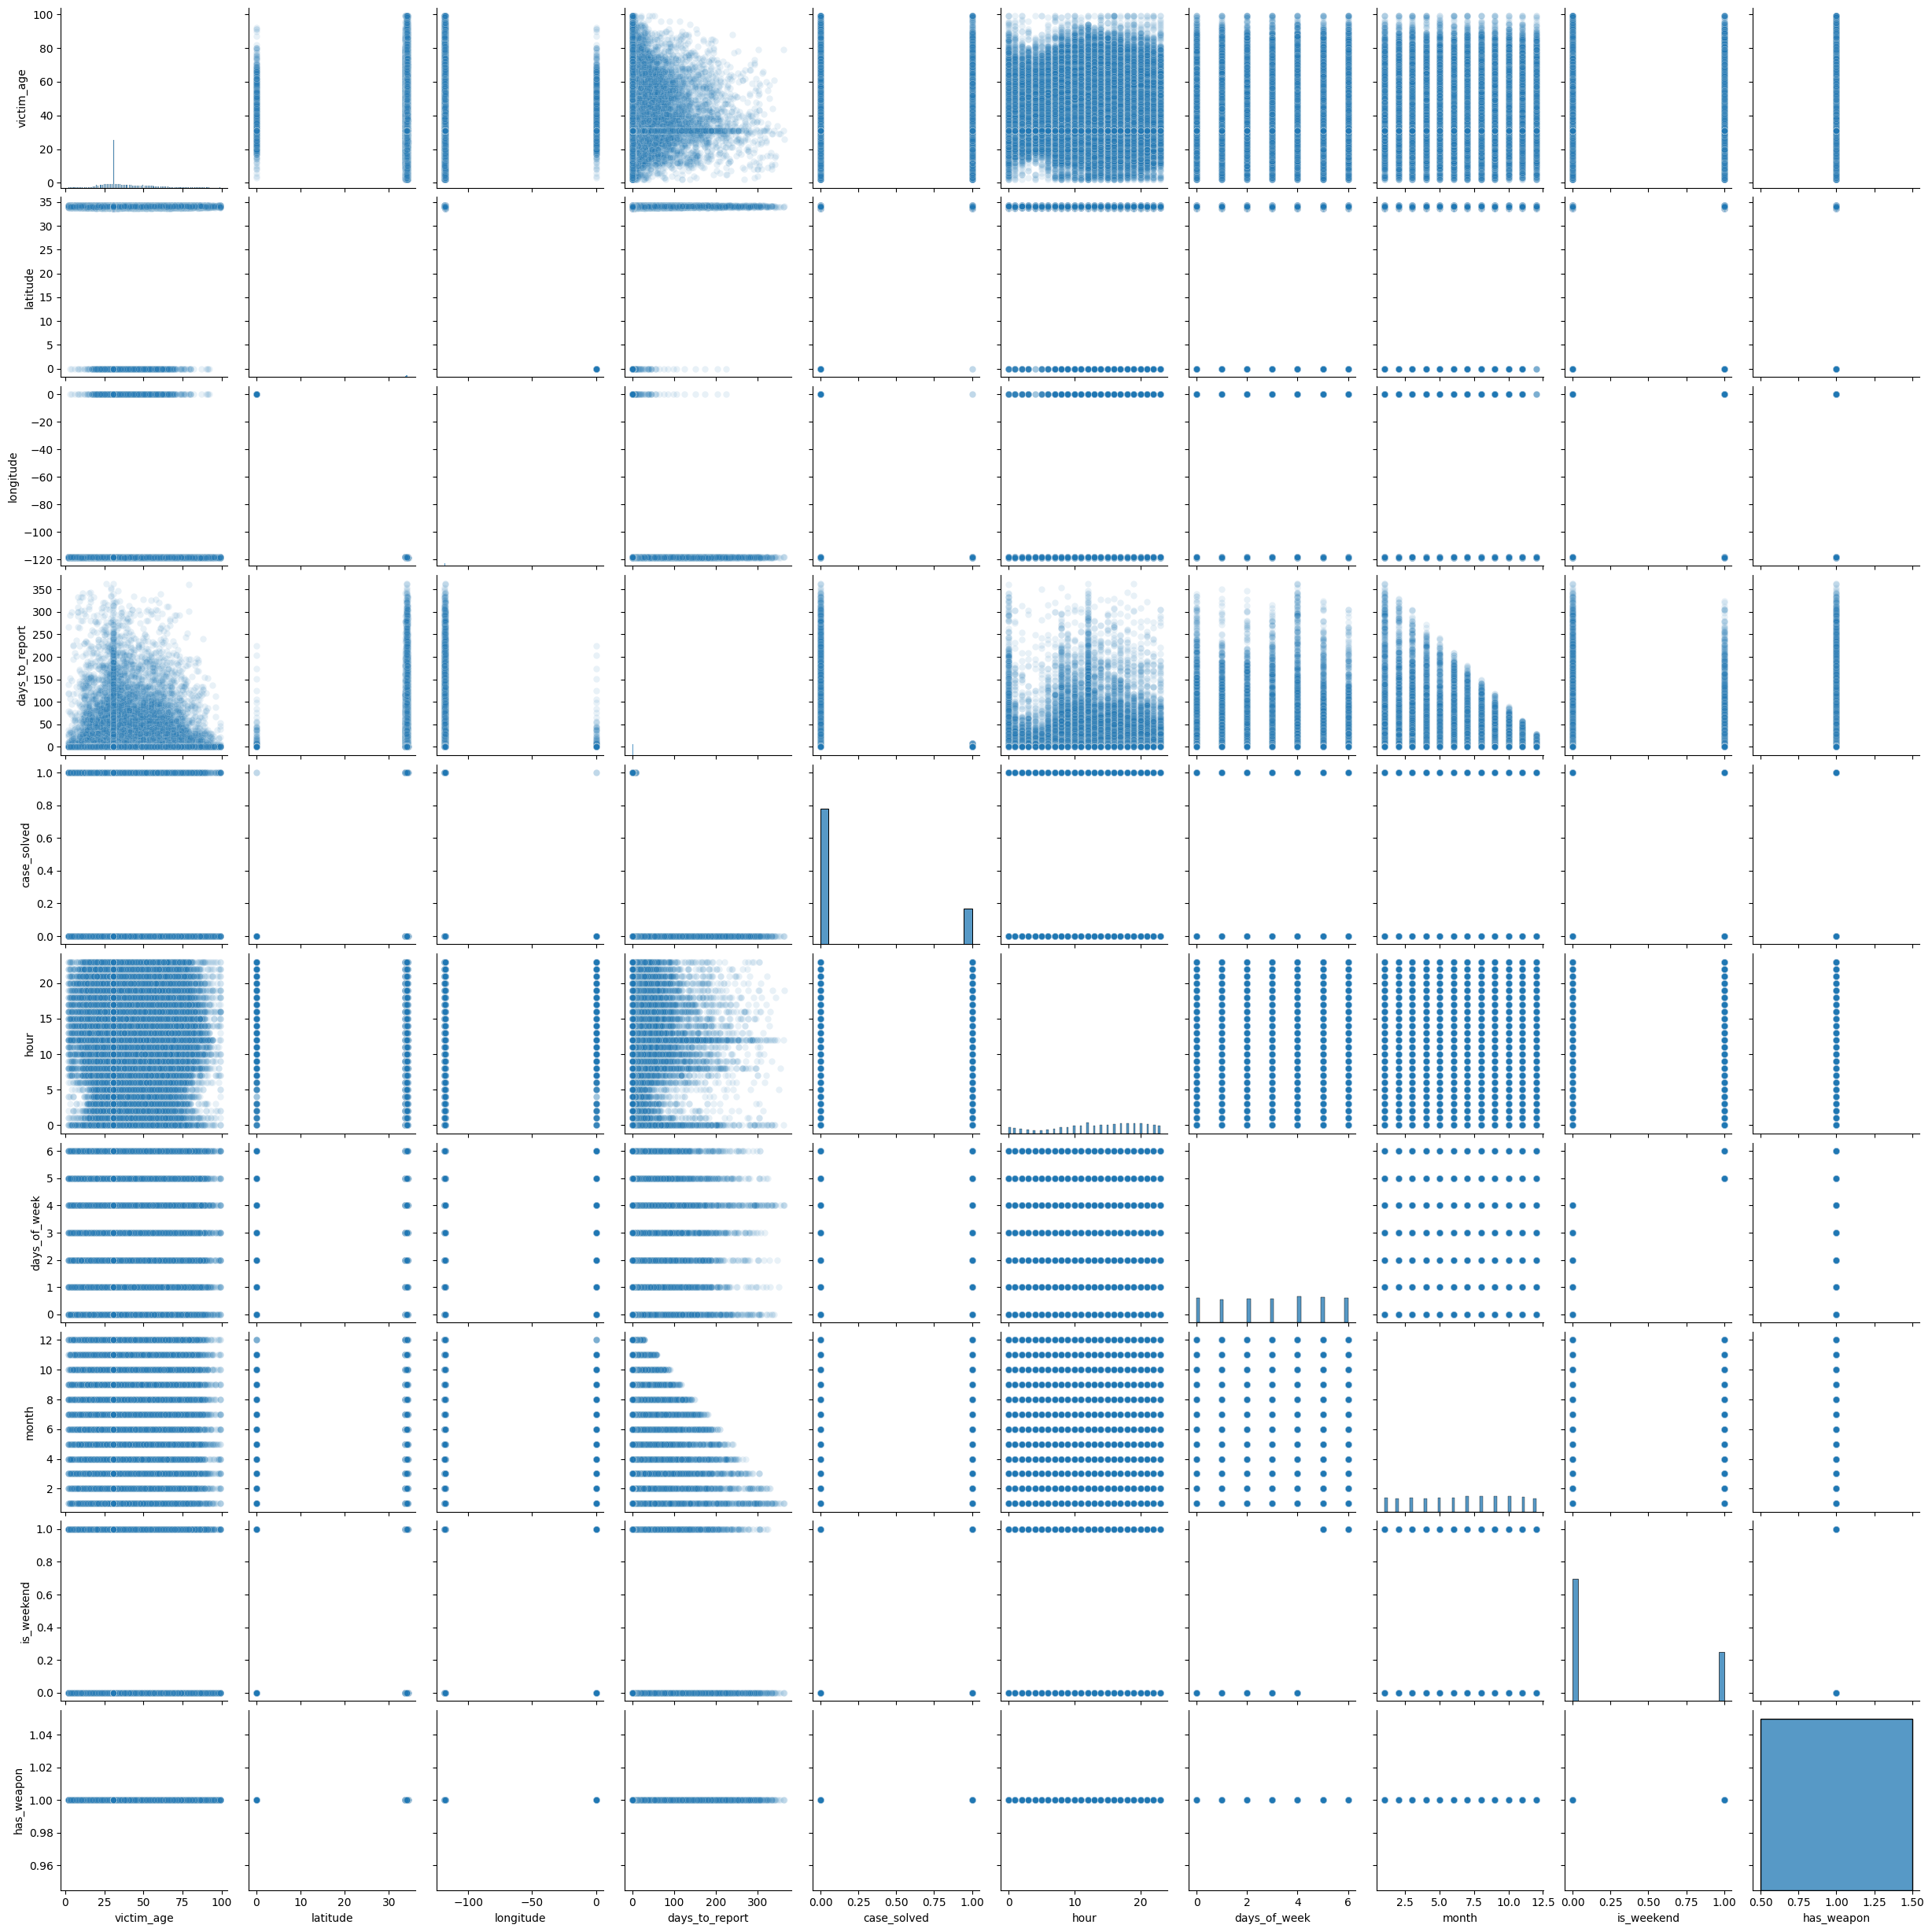

In [210]:
columns_attri = ['victim_age', 'latitude', 'longitude', 'days_to_report','case_solved', 'hour', 'days_of_week', 'month', 'is_weekend', 'has_weapon']
sns.pairplot(lapd_data[columns_attri], plot_kws={'alpha':0.1})
plt.show()

Feature Engineering

In [211]:
lapd_data['hour'] = lapd_data['date_occurred'].dt.hour
lapd_data['days_of_week'] = lapd_data['date_occurred'].dt.dayofweek
lapd_data['month'] = lapd_data['date_occurred'].dt.month


In [212]:
lapd_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,modus_operandi,victim_age,...,crime_description,weapon_description,days_to_report,hour,days_of_week,month,is_weekend,has_weapon,crime_severity,year
0,211414090,2021-06-27,2021-06-20 20:00:00,14,Pacific,1464,1,480,0344,32.0,...,BIKE - STOLEN,NONE/NO WEAPON,6,20,6,6,1,1,480,2021
1,210504861,2021-01-22,2021-01-21 22:00:00,5,Harbor,515,1,510,NaN,31.0,...,VEHICLE - STOLEN,NONE/NO WEAPON,0,22,3,1,0,1,510,2021
2,210104843,2021-01-21,2021-01-21 02:00:00,1,Central,139,1,510,NaN,31.0,...,VEHICLE - STOLEN,NONE/NO WEAPON,0,2,3,1,0,1,510,2021
3,210115564,2021-08-22,2021-08-22 07:00:00,1,Central,151,1,350,1308 0344 0345 1822,29.0,...,"THEFT, PERSON",NONE/NO WEAPON,0,7,6,8,1,1,350,2021
4,211421187,2021-11-09,2021-11-07 19:00:00,14,Pacific,1465,1,510,NaN,31.0,...,VEHICLE - STOLEN,NONE/NO WEAPON,1,19,6,11,1,1,510,2021


In [213]:
lapd_data['is_weekend'] = lapd_data['days_of_week'].isin([5,6]).astype(int)
lapd_data['has_weapon'] = (lapd_data['weapon_code'] != '').astype(int)


In [214]:
#assuming the  lower crime code are more severe crime and higher are less severe crime code
lapd_data['crime_severity'] = lapd_data['crime_code'].astype(int)

In [217]:
from sklearn.preprocessing import LabelEncoder
lb_area = LabelEncoder()
lapd_data['area_encoded'] = lb_area.fit_transform(lapd_data['area_name'])
lb_premises = LabelEncoder()
lapd_data['premise_encoded'] = lb_premises.fit_transform(lapd_data['premise_description'])
lb_crimedes = LabelEncoder()
lapd_data['crime_encoded'] = lb_crimedes.fit_transform(lapd_data['crime_description'])
lb_weapon = LabelEncoder()
lapd_data['weapon_encoded'] = lb_weapon.fit_transform(lapd_data['weapon_description'])


In [222]:
lapd_data = pd.get_dummies(lapd_data, columns=['victim_gender'], prefix='gender')

In [225]:
lapd_data[['gender_F', 'gender_M', 'gender_Unknown']] = lapd_data[['gender_F', 'gender_M', 'gender_Unknown']].astype(int)


In [226]:
lapd_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,modus_operandi,victim_age,...,is_weekend,has_weapon,crime_severity,area_encoded,premise_encoded,crime_encoded,weapon_encoded,gender_F,gender_M,gender_Unknown
0,211414090,2021-06-27,2021-06-20 20:00:00,14,Pacific,1464,1,480,0344,32.0,...,1,1,480,12,79,11,36,0,1,0
1,210504861,2021-01-22,2021-01-21 22:00:00,5,Harbor,515,1,510,NaN,31.0,...,0,1,510,4,252,127,36,0,0,1
2,210104843,2021-01-21,2021-01-21 02:00:00,1,Central,139,1,510,NaN,31.0,...,0,1,510,1,252,127,36,0,0,1
3,210115564,2021-08-22,2021-08-22 07:00:00,1,Central,151,1,350,1308 0344 0345 1822,29.0,...,1,1,350,1,241,116,36,0,1,0
4,211421187,2021-11-09,2021-11-07 19:00:00,14,Pacific,1465,1,510,NaN,31.0,...,1,1,510,12,252,127,36,0,0,1


In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['victim_age', 'latitude', 'longitude', 'hour', 'crime_severity']
lapd_data[numeric_features] = scaler.fit_transform(lapd_data[numeric_features])

In [228]:
lapd_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,modus_operandi,victim_age,...,is_weekend,has_weapon,crime_severity,area_encoded,premise_encoded,crime_encoded,weapon_encoded,gender_F,gender_M,gender_Unknown
0,211414090,2021-06-27,2021-06-20 20:00:00,14,Pacific,1464,1,480,0344,-0.390465,...,1,1,-0.116180,12,79,11,36,0,1,0
1,210504861,2021-01-22,2021-01-21 22:00:00,5,Harbor,515,1,510,NaN,-0.462966,...,0,1,0.026870,4,252,127,36,0,0,1
2,210104843,2021-01-21,2021-01-21 02:00:00,1,Central,139,1,510,NaN,-0.462966,...,0,1,0.026870,1,252,127,36,0,0,1
3,210115564,2021-08-22,2021-08-22 07:00:00,1,Central,151,1,350,1308 0344 0345 1822,-0.607969,...,1,1,-0.736066,1,241,116,36,0,1,0
4,211421187,2021-11-09,2021-11-07 19:00:00,14,Pacific,1465,1,510,NaN,-0.462966,...,1,1,0.026870,12,252,127,36,0,0,1


Modeling building

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

features = ['victim_age', 'latitude', 'longitude', 'hour', 'days_of_week', 'is_weekend', 
            'crime_severity', 'has_weapon', 'area_encoded', 'premise_encoded', 
            'crime_encoded', 'weapon_encoded', 'gender_M', 'gender_F', 'gender_Unknown']
X = lapd_data[features]
y = lapd_data['case_solved']

In [231]:
X[:10]

,victim_age,latitude,longitude,hour,days_of_week,is_weekend,crime_severity,has_weapon,area_encoded,premise_encoded,crime_encoded,weapon_encoded,gender_M,gender_F,gender_Unknown
0,-0.390465,0.052760,-0.090775,1.024056,6,1,-0.116180,1,12,79,11,36,1,0,0
1,-0.462966,-0.011702,-0.076992,1.330518,3,0,0.026870,1,4,252,127,36,0,0,1
2,-0.462966,0.074536,-0.073162,-1.734100,3,0,0.026870,1,1,252,127,36,0,0,1
3,-0.607969,0.077167,-0.075925,-0.967946,6,1,-0.736066,1,1,241,116,36,1,0,0
4,-0.462966,0.055460,-0.090077,0.870825,6,1,0.026870,1,12,252,127,36,0,0,1
5,-0.462966,0.065639,-0.073860,-2.040562,1,0,0.026870,1,9,252,127,36,0,0,1
6,-0.462966,-11.710711,11.718762,-0.048560,0,0,0.026870,1,11,252,127,36,0,0,1
7,-0.462966,0.082048,-0.074299,1.177287,1,0,0.026870,1,1,252,127,36,0,0,1
8,-0.462966,0.089041,-0.072145,0.411132,1,0,0.026870,1,10,252,127,36,0,0,1
9,-0.462966,0.067058,-0.091244,0.717594,0,0,0.026870,1,12,252,127,36,0,0,1


In [232]:
y[:10]

0    0
1    1
2    1
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: case_solved, dtype: int64

Feature Selection 

Logistic Regression

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2,
                                                    random_state=101,stratify=y)

In [282]:
X_train.shape

(162471, 15)

In [283]:
X_test.shape

(40618, 15)

checking for Class imbalance

In [284]:
y_train.value_counts(normalize=True)*100

case_solved
0    79.103348
1    20.896652
Name: proportion, dtype: float64

In [285]:
y_test.value_counts(normalize=True)*100

case_solved
0    79.102861
1    20.897139
Name: proportion, dtype: float64

In [286]:

log_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [287]:
predictions = log_model.predict(X_test)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [288]:
log_model.predict_proba(X_test)

array([[0.81903123, 0.18096877],
       [0.71155465, 0.28844535],
       [0.8770277 , 0.1229723 ],
       ...,
       [0.82100241, 0.17899759],
       [0.59792837, 0.40207163],
       [0.89481714, 0.10518286]])

In [289]:
log_model.predict_proba(X_test)[:20]

array([[0.81903123, 0.18096877],
       [0.71155465, 0.28844535],
       [0.8770277 , 0.1229723 ],
       [0.8732804 , 0.1267196 ],
       [0.91018053, 0.08981947],
       [0.56578699, 0.43421301],
       [0.86582472, 0.13417528],
       [0.77164122, 0.22835878],
       [0.48835891, 0.51164109],
       [0.84618199, 0.15381801],
       [0.93365292, 0.06634708],
       [0.85154064, 0.14845936],
       [0.82206636, 0.17793364],
       [0.83790367, 0.16209633],
       [0.6442772 , 0.3557228 ],
       [0.85469662, 0.14530338],
       [0.79734508, 0.20265492],
       [0.78331626, 0.21668374],
       [0.87904811, 0.12095189],
       [0.71063807, 0.28936193]])

In [339]:
from sklearn.metrics import  classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     32130
           1       0.42      0.07      0.12      8488

    accuracy                           0.79     40618
   macro avg       0.61      0.52      0.50     40618
weighted avg       0.72      0.79      0.72     40618



In [340]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions))
print("AUC-ROC:", roc_auc_score(y_test, predictions))

Accuracy: 0.7860308237727116
Precision: 0.4239700374531835
Recall: 0.06668237511781339
F1-Score: 0.11523974345922834
AUC-ROC: 0.5213741785330742


my model is performing well on both training and testing datas for logistic regression as shown  below because both accuracy scores is about 0.786 so there's no overfitting in my model  when logistic regression is used.

In [354]:
#accurary score on training datas
print('Accuracy on training data:', log_model.score(X_train, y_train))
#accuracy score of test datas
print("Accuracy on testing data:", accuracy_score(y_test, predictions))


Accuracy on training data: 0.7861341408620616
Accuracy on testing data: 0.7860308237727116


In [355]:
confusion_matrix(y_test,predictions)

array([[31361,   769],
       [ 7922,   566]])

In [356]:
y_test.value_counts()

case_solved
0    32130
1     8488
Name: count, dtype: int64

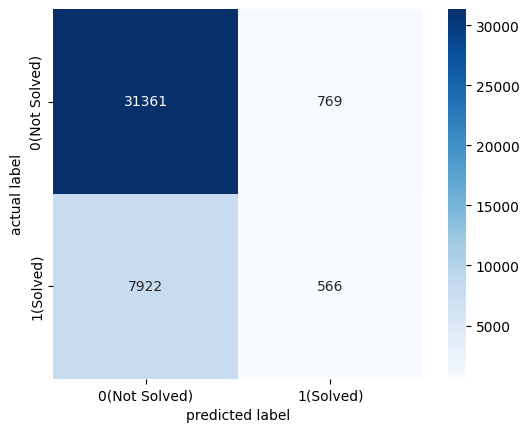

In [357]:
cnf_matrix = confusion_matrix(y_test,predictions)
# np.set_printoptions(precision=2)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Solved)', '1(Solved)'],
                        yticklabels=['0(Not Solved)', '1(Solved)'],cmap=plt.cm.Blues)
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

random forest classifier

In [358]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [359]:


rf_predictions = rf_model.predict(X_test)
rf_probab = rf_model.predict_proba(X_test)

In [360]:
rf_predictions

array([0, 0, 0, ..., 0, 1, 0])

In [361]:
rf_probab

array([[1.  , 0.  ],
       [0.64, 0.36],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [0.45, 0.55],
       [0.94, 0.06]])

In [362]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     32130
           1       0.67      0.43      0.52      8488

    accuracy                           0.84     40618
   macro avg       0.76      0.69      0.71     40618
weighted avg       0.82      0.84      0.82     40618



In [363]:
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1-Score:", f1_score(y_test, rf_predictions))
print("AUC-ROC:", roc_auc_score(y_test, rf_predictions))

Accuracy: 0.8354916539465261
Precision: 0.6661759293338241
Recall: 0.42648444863336477
F1-Score: 0.5200402241057319
AUC-ROC: 0.6850131549111423


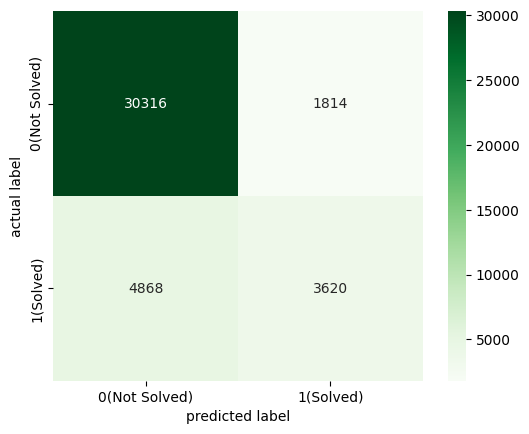

In [364]:
cnf_matrix = confusion_matrix(y_test,rf_predictions)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(Not Solved)', '1(Solved)'],
                        yticklabels=['0(Not Solved)', '1(Solved)'],cmap=plt.cm.Greens)
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

Even though the random forest classifier accuracy is more than the logistic regression However, if you check my model accuracy when i use random forest classifier  is performing well on training with accuracy score of about 0.999~ and not on  testing datas with 0.83549 as shown  below so my model is overfitting.   When random forest classifier is used. so i can further focus on improve my model  performance by doing some hyperparameter tuning and because RFclassifier is accuracy is high i am going to focus more on my RFmodel

In [366]:
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Accuracy: 0.8354916539465261


In [367]:
rf_model.score(X_train, y_train)

0.999643013214666

Feature Importance

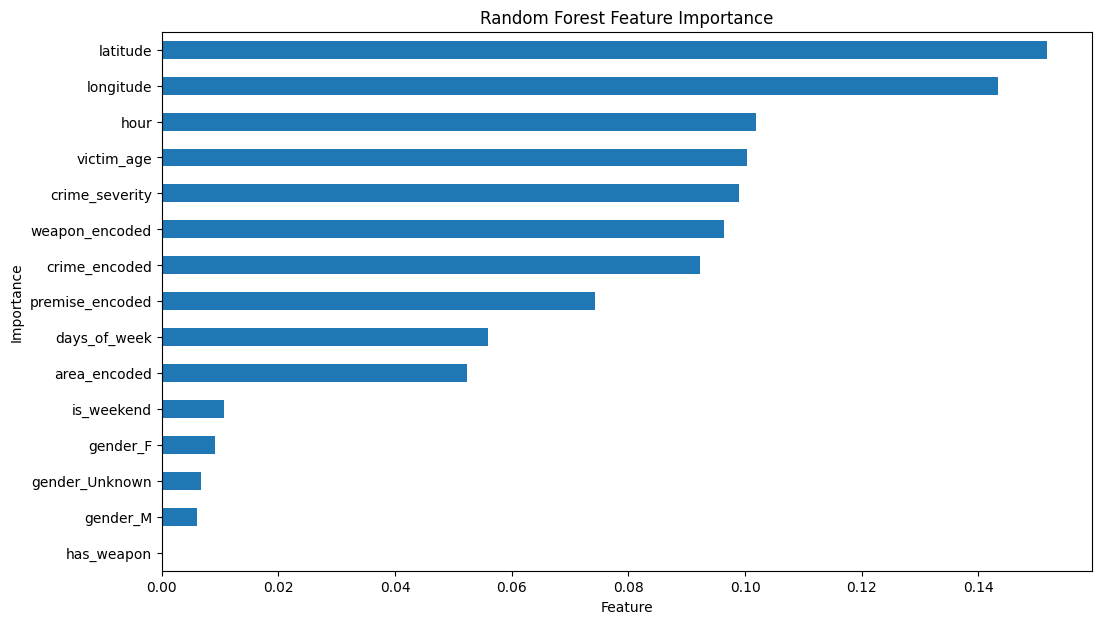

In [372]:
features_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(12,7))
features_importance.sort_values().plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

The bar chart of the features importance shows that the feature of whether a crime has weapon does not really show any importances to my model to be able classify if crime is solved or not  as i can drop it and also whether the crime is happening weekend , whether the victim is female, Male or Unknown features are also not much importance features to how my model classifies. This feature importance bar chat allows me to choose my best features to be able to train my model and reduce complexity.

Hyperparameter Tuning

I will be using GridSearcHCV to address the class imbalance

Hyperparameter tuning for Logistic Regression

In [379]:
from sklearn.model_selection import GridSearchCV
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'] 
}
lr_model_ht = LogisticRegression(max_iter=1000, random_state=42)

In [380]:
lr_gridcv = GridSearchCV(lr_model_ht, lr_param_grid, cv=5, scoring= 'f1', n_jobs=-1)
lr_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [381]:
print('Best Parameter for Logistic Regression:',lr_gridcv.best_params_)
print('Best F1 score:',lr_gridcv.best_score_)

Best Parameter for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score: 0.1364307673244546


In [383]:
best_log_model = lr_gridcv.best_estimator_
best_lr_pred = best_log_model.predict(X_test)



In [387]:
best_lr_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [393]:
best_lr_probab = best_log_model.predict_proba(X_test)
best_lr_probab[:10]

array([[0.81750072, 0.18249928],
       [0.7026925 , 0.2973075 ],
       [0.87786436, 0.12213564],
       [0.87100432, 0.12899568],
       [0.91063077, 0.08936923],
       [0.56041091, 0.43958909],
       [0.85602734, 0.14397266],
       [0.74631455, 0.25368545],
       [0.54332311, 0.45667689],
       [0.83983151, 0.16016849]])

In [397]:
print('Result of Logistic Regression after using Grid Search CV')
print("Accuracy:", accuracy_score(y_test, best_lr_pred))
print("Precision:", precision_score(y_test, best_lr_pred))
print("Recall:", recall_score(y_test, best_lr_pred))
print("F1-Score:", f1_score(y_test, best_lr_pred))
print("AUC-ROC:", roc_auc_score(y_test, best_lr_pred))
print(classification_report(y_test, best_lr_pred))
print(confusion_matrix(y_test,best_lr_pred))

Result of Logistic Regression after using Grid Search CV
Accuracy: 0.7871633266039687
Precision: 0.447561790247161
Recall: 0.0789349670122526
F1-Score: 0.1342013019529294
AUC-ROC: 0.5265978912247693
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     32130
           1       0.45      0.08      0.13      8488

    accuracy                           0.79     40618
   macro avg       0.62      0.53      0.51     40618
weighted avg       0.73      0.79      0.72     40618

[[31303   827]
 [ 7818   670]]


Random Forest Classifier with GridSearch CV including all of my features

In [484]:
#This is my best parameters when i tune using GRIDSEARCHCV, so this is what i used above, since gridsearchcv is slow and exhaustive 
# to reach optimum but has advantage of not missing the best global optimum.. this is why I used it and it took ~ 6mins (382 seconds)
#  to iterate in the development stage.
#best parameter after fine tuning to adjust f1-score.
rf_gridcv = RandomForestClassifier(n_estimators= 200,
                                    min_samples_leaf=1,
                                    min_samples_split= 5,
                                    max_depth= None
                                 )
    

In [487]:
best_rf_model = rf_gridcv.fit(X_train,y_train)
best_rf_pred = best_rf_model.predict(X_test)
best_rf_proba = best_rf_model.predict_proba(X_test)

In [488]:

best_rf_pred = best_rf_model.predict(X_test)
best_rf_proba = best_rf_model.predict_proba(X_test)

In [489]:
print('Result of Random Forest Classifier after applying Grid Search CV')
print("Accuracy:", accuracy_score(y_test, best_rf_pred))
print("Precision:", precision_score(y_test, best_rf_pred))
print("Recall:", recall_score(y_test, best_rf_pred))
print("F1-Score:", f1_score(y_test, best_rf_pred))
print("AUC-ROC:", roc_auc_score(y_test, best_rf_pred))
print(classification_report(y_test, best_rf_pred))
print(confusion_matrix(y_test,best_rf_pred))

Result of Random Forest Classifier after applying Grid Search CV
Accuracy: 0.8375350829681422
Precision: 0.6769720816938355
Recall: 0.4256597549481621
F1-Score: 0.5226763110307414
AUC-ROC: 0.6860013682926307
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     32130
           1       0.68      0.43      0.52      8488

    accuracy                           0.84     40618
   macro avg       0.77      0.69      0.71     40618
weighted avg       0.82      0.84      0.82     40618

[[30406  1724]
 [ 4875  3613]]


Above shows that I have been able to improve my model to be able and is now much better at identifying true solved cases, while also reducing false positives. the F1-score  was improved more using gridsearch cv as compared to the orignal random forest classifier without the tuning and getting the best parameter.

In [490]:
best_rf_model.score(X_train, y_train)

0.9742661767330785

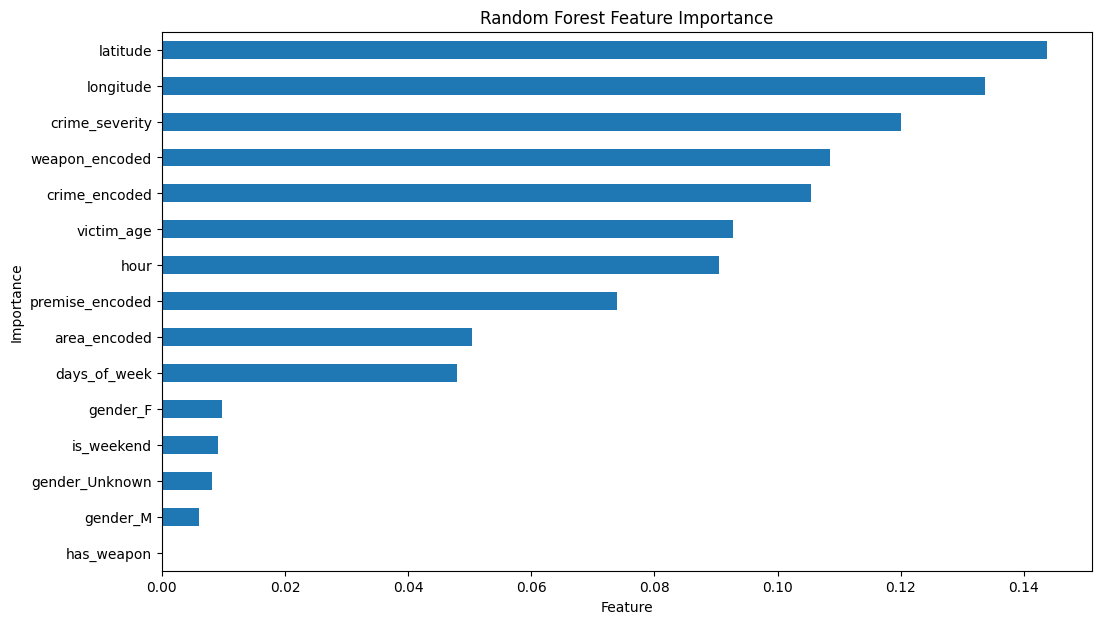

In [491]:
features_importance = pd.Series(best_rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(12,7))
features_importance.sort_values().plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Also from the feature selection above the order of importance features has changed when i used GridsearchCV as compared to random forest classifier without tuning the parameters. As seen the hour feature has moved down , but latitude, longtude, crime severity .. are sttill very importance feature for my model to classified if case is solved or not solved

To continue to improve my model, I will try and fit my model again to adjust accuracy scores, since i have been able to improve F1 SCORE above which is my goal in this model,I can improve the accuracy score as well to try and further reduce overfiting.. I Will also drop by has_weapon feature since it might be adding noise 

Random Forest Classifier without some features which really dont effect my model 

In [492]:
X_drp_has_weapon = X.drop(columns=['has_weapon','gender_F', 'gender_M', 'gender_Unknown', 'is_weekend'])
X_drp_has_weapon

,victim_age,latitude,longitude,hour,days_of_week,crime_severity,area_encoded,premise_encoded,crime_encoded,weapon_encoded
0,-0.390465,0.052760,-0.090775,1.024056,6,-0.116180,12,79,11,36
1,-0.462966,-0.011702,-0.076992,1.330518,3,0.026870,4,252,127,36
2,-0.462966,0.074536,-0.073162,-1.734100,3,0.026870,1,252,127,36
3,-0.607969,0.077167,-0.075925,-0.967946,6,-0.736066,1,241,116,36
4,-0.462966,0.055460,-0.090077,0.870825,6,0.026870,12,252,127,36
...,...,...,...,...,...,...,...,...,...,...
203084,-0.100459,0.055599,-0.097128,-1.887331,6,1.223726,12,22,14,30
203085,-1.332985,-0.034516,-0.078907,0.104670,2,1.123591,4,284,124,36
203086,-0.462966,0.082464,-0.077301,1.483748,4,0.026870,13,252,127,36
203087,-1.622991,0.063042,-0.083385,-0.201791,0,-0.736066,15,252,116,36


In [493]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_drp_has_weapon,
                                                    y, test_size=0.2,
                                                    random_state=101,stratify=y)

In [494]:
# The best parameters used below was gotten when i used GRIDSEARHCV .. and because of its slowness to converge and exhuastive 
# i didnt include it here in my model.. but did it in my development stage..it took me 7mins to reach convergence but did nt always miss global optimum
#this is why i used it.
rf_ac_gridcv = RandomForestClassifier(n_estimators= 250,
                                    min_samples_leaf=1,
                                    min_samples_split= 5,
                                    max_depth= 30
                                 )

In [495]:
best_rf_ac_model = rf_ac_gridcv.fit(X_new_train,y_new_train)
best_rf_ac_pred = best_rf_ac_model.predict(X_new_test)
best_rf_ac_proba = best_rf_ac_model.predict_proba(X_new_test)

In [496]:
print(best_rf_ac_pred)
print(best_rf_ac_proba)

[0 0 0 ... 0 0 0]
[[9.95610335e-01 4.38966509e-03]
 [6.17076190e-01 3.82923810e-01]
 [9.99872194e-01 1.27805865e-04]
 ...
 [9.83208254e-01 1.67917460e-02]
 [5.05400000e-01 4.94600000e-01]
 [8.46366167e-01 1.53633833e-01]]


In [497]:
print('Result of Random Forest Classifier after applying Grid Search CV')
print("Accuracy:", accuracy_score(y_new_test, best_rf_ac_pred))
print("Precision:", precision_score(y_new_test, best_rf_ac_pred))
print("Recall:", recall_score(y_new_test, best_rf_ac_pred))
print("F1-Score:", f1_score(y_new_test, best_rf_ac_pred))
print("AUC-ROC:", roc_auc_score(y_new_test, best_rf_ac_pred))
print(classification_report(y_new_test, best_rf_ac_pred))
print(confusion_matrix(y_new_test,best_rf_ac_pred))

Result of Random Forest Classifier after applying Grid Search CV
Accuracy: 0.8386675857993993
Precision: 0.6726137377341659
Recall: 0.4441564561734213
F1-Score: 0.5350173845171362
AUC-ROC: 0.6935223612955498
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     32130
           1       0.67      0.44      0.54      8488

    accuracy                           0.84     40618
   macro avg       0.77      0.69      0.72     40618
weighted avg       0.82      0.84      0.83     40618

[[30295  1835]
 [ 4718  3770]]


I noticed even when i remove some of the features , my model really did improve but with a small changes ..the accuracy changes from 0.83755 to 0.83866 and F1 Score changes from 0.522 to 0.535 so this is still the best from all the model with all my improvement .. further improvement like SMOTE..which I will test below to see if it improves my model or adding more features/training data might definitely improve it

Trying SMOTE  below on my last model to see the performance

In [498]:
! pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [499]:
y_new_test.value_counts(normalize=True)*100

case_solved
0    79.102861
1    20.897139
Name: proportion, dtype: float64

Resampling using SMOTE

In [500]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_drp_has_weapon, y)
print("Original:", sum(y==1), "| Resampled:", sum(y_resampled==1))

Original: 42439 | Resampled: 160650


In [ ]:
y_new_test.value_counts(normalize=True)*100

Resplitting my resampled data

In [501]:
X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled = train_test_split(
                                             X_resampled,
                                             y_resampled,
                                             test_size=0.2,
                                             random_state=42,
                                             stratify=y_resampled
    )

In [502]:
y_test_resampled.value_counts(normalize=True) * 100

case_solved
0    50.0
1    50.0
Name: proportion, dtype: float64

In [505]:
y_train_resampled.value_counts(normalize=True) *100

case_solved
0    50.0
1    50.0
Name: proportion, dtype: float64

After applying SMOTE method my sampling is now balanced for both Not Solved and Solved is not balanced so i will now retrain my model. i wll focus on my random forest model or this

In [506]:
rf_sm_gridcv = RandomForestClassifier(n_estimators= 250,
                                    min_samples_leaf=1,
                                    min_samples_split= 5,
                                    max_depth= 30
                                 )

best_rf_model_sm = rf_sm_gridcv.fit(X_train_resampled,y_train_resampled)
best_rf_pred_sm = best_rf_model_sm.predict(X_test_resampled)
best_rf_proba_sm = best_rf_model_sm.predict_proba(X_test_resampled)

In [510]:
print('Result of Random Forest Classifier after applying Grid Search CV Best Paramater and SMOTE')
print("Accuracy:", accuracy_score(y_test_resampled, best_rf_pred_sm))
print("Precision:", precision_score(y_test_resampled, best_rf_pred_sm))
print("Recall:", recall_score(y_test_resampled, best_rf_pred_sm))
print("F1-Score:", f1_score(y_test_resampled, best_rf_pred_sm))
print("AUC-ROC:", roc_auc_score(y_test_resampled, best_rf_pred_sm))
print(classification_report(y_test_resampled, best_rf_pred_sm))
print(confusion_matrix(y_test_resampled,best_rf_pred_sm))

Result of Random Forest Classifier after applying Grid Search CV Best Paramater and SMOTE
Accuracy: 0.8733737939620293
Precision: 0.8609815544789817
Recall: 0.8905384375972611
F1-Score: 0.8755106099781221
AUC-ROC: 0.8733737939620293
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     32130
           1       0.86      0.89      0.88     32130

    accuracy                           0.87     64260
   macro avg       0.87      0.87      0.87     64260
weighted avg       0.87      0.87      0.87     64260

[[27510  4620]
 [ 3517 28613]]


GREAT IMPROVEMENT IN MY MODEL,see how my F1 score has improved fantastically  from 0.535 before using SMOTE to 0.87555 , Now my model is now Much better balanced — model now predicts both classes well. High F1 means both precision and recall improved for “Solved” cases.

CONCLUSION: WHILE I LEAVE IT HERE , I CAN STILL CONTINUE TO IMPROVE MY MODEL..AND KEEP ADJUSTING TO GET BETTER BUT I WILL STOP HERE!!! SO MY BEST MODEL IS THE RANDOM FOREST CLASSIFIER WITH BEST PARAMETERS  USING GRIDSEARCHCV AND SMOTE FOR CLASS BALANCING